In [1]:
import numpy as np
import pandas as pd
import sklearn.neighbors
import sklearn.model_selection
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition

In [2]:
def score_embedding(data, labels, k=10, n_neighbors=5, random_state=42):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    cv = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=random_state)
    return sklearn.model_selection.cross_val_score(model, data, labels, cv=cv)

In [3]:
def compare_embeddings(embeddings, n_neighbors=5, k=10, random_state=42):
    cross_val_scores = {}
    for alg in embeddings.keys():
        cross_val_scores[alg] = score_embedding(embeddings[alg][['x', 'y']].values, 
                                                embeddings[alg]['labels'].values,
                                                n_neighbors=n_neighbors,
                                                k=k,
                                                random_state=random_state)
    return pd.DataFrame(cross_val_scores).assign(n_neighbors=n_neighbors)

In [4]:
coil20 = {}
coil20['tsne'] = pd.read_csv('embedding_coil20_tsne1.csv', index_col=0)
coil20['umap'] = pd.read_csv('embedding_coil20_umap1.csv', index_col=0)
coil20['lvis'] = pd.read_csv('embedding_coil20_largevis1.csv', index_col=0)
coil20['fits'] = pd.read_csv('embedding_coil20_fitsne1.csv', index_col=0)
coil20['leig'] = pd.read_csv('embedding_coil20_eigenmaps1.csv', index_col=0)
coil20['pca'] = pd.read_csv('embedding_coil20_pca.csv', index_col=0)

In [5]:
df = pd.concat(compare_embeddings(coil20, n_neighbors=n) for n in (10,20,40,80,160))

In [6]:
df.groupby('n_neighbors').mean()

,tsne,umap,lvis,fits,leig,pca
n_neighbors,,,,,,
10,0.934286,0.920714,0.888125,0.918750,0.628661,0.667321
20,0.901250,0.907232,0.869643,0.906339,0.604643,0.663214
40,0.856518,0.904464,0.833839,0.856875,0.577500,0.620000
80,0.789375,0.899107,0.803036,0.775268,0.564643,0.531250
160,0.608929,0.802679,0.615982,0.625625,0.445804,0.375089


In [7]:
df.groupby('n_neighbors').std() * 2

,tsne,umap,lvis,fits,leig,pca
n_neighbors,,,,,,
10,0.114791,0.075395,0.091574,0.091306,0.152869,0.178984
20,0.132566,0.063790,0.124960,0.107171,0.185160,0.195957
40,0.125306,0.055921,0.105800,0.116351,0.159152,0.229716
80,0.117606,0.057907,0.099500,0.088200,0.119069,0.294494
160,0.066842,0.137718,0.065813,0.078301,0.110413,0.110594


In [18]:
import seaborn as sns
sns.set()

In [23]:
tidy_df = df.reset_index().melt(id_vars=['index', 'n_neighbors'], 
                                value_vars=['fits', 'leig', 'lvis', 'pca', 'tsne', 'umap'])
tidy_df = tidy_df.rename(columns={'index':'fold', 'variable':'algorithm'})
tidy_df = tidy_df[tidy_df.algorithm != 'fits']

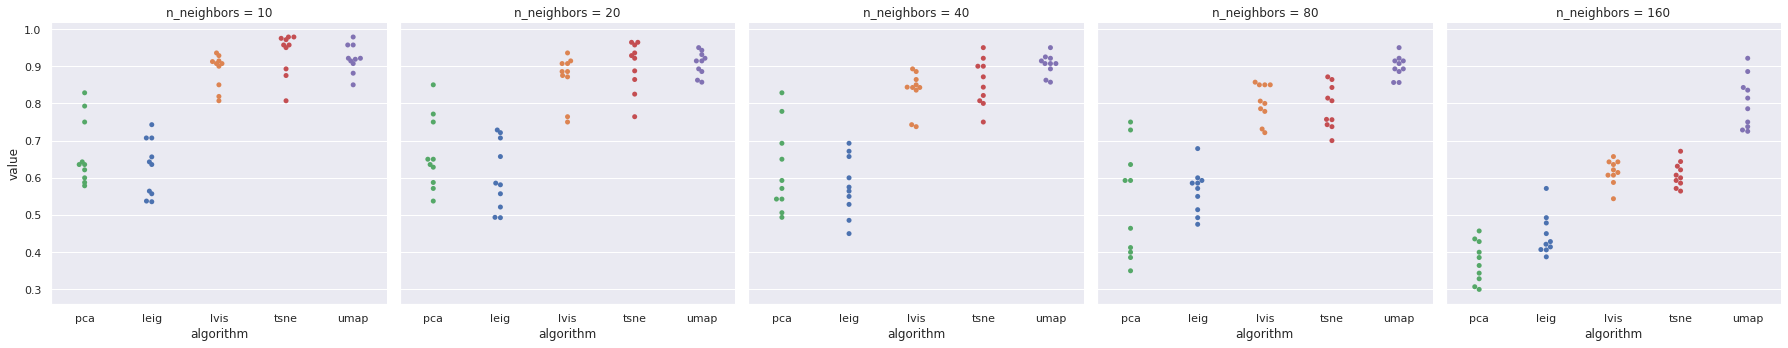

In [26]:
sns.catplot(x='algorithm', 
            y='value', 
            hue='algorithm', 
            kind='swarm', 
            col='n_neighbors',
            order=['pca', 'leig', 'lvis', 'tsne', 'umap'],
            data=tidy_df)

In [27]:
tidy_df.assign(dataset='COIL-20').to_csv('coil20_crossval_results.csv')